In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [13]:
df = pd.read_csv(r'C:\Users\desai\OneDrive\Desktop\disease prediction\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

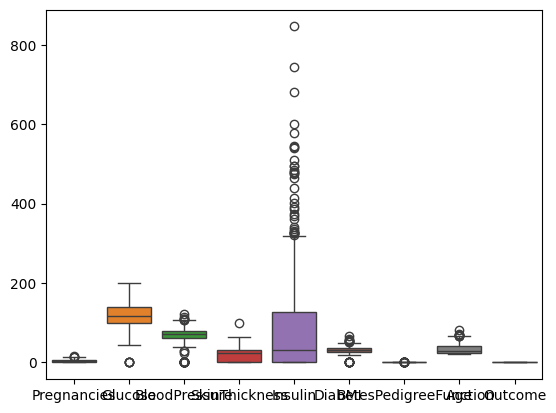

In [19]:
sns.boxplot(data=df)

In [20]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

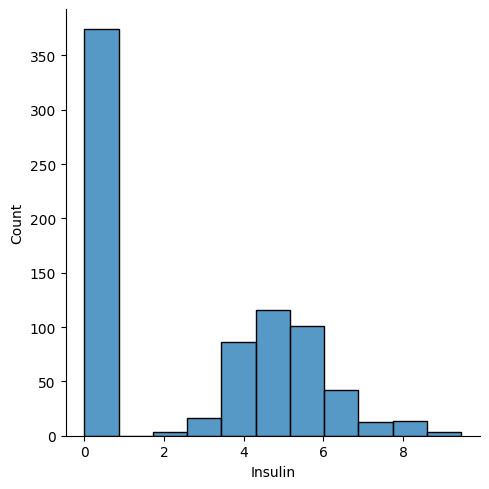

In [36]:
sns.displot(np.cbrt(df.Insulin))

In [33]:
df.Insulin

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [34]:
np.sqrt(df.Insulin)

0       0.000000
1       0.000000
2       0.000000
3       9.695360
4      12.961481
         ...    
763    13.416408
764     0.000000
765    10.583005
766     0.000000
767     0.000000
Name: Insulin, Length: 768, dtype: float64

In [76]:
X = df.drop(['Outcome'],axis = 1)
y = df.Outcome
print(f'X = {X.shape},y = {y.shape}')

X = (768, 8),y = (768,)


In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state= 2 )

In [78]:
print(f'X_train_shape = {X_train.shape},X_test_shape = {X_test.shape}')


X_train_shape = (614, 8),X_test_shape = (154, 8)


In [79]:
print(f'y_train_shape = {y_train.shape},y_test_shape = {y_test.shape}')


y_train_shape = (614,),y_test_shape = (154,)


In [82]:
classifier = svm.SVC(kernel ='linear')

In [83]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [84]:
y_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction,y_train)

In [85]:
print('Accuracy score of the test data:', training_data_accuracy)

Accuracy score of the test data: 0.7833876221498371


In [86]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

In [87]:
y_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction,y_test)

In [88]:
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.7727272727272727


Text(0.5, 1.0, 'Confusion Matrix- svm\xa0Classifier\xa0')

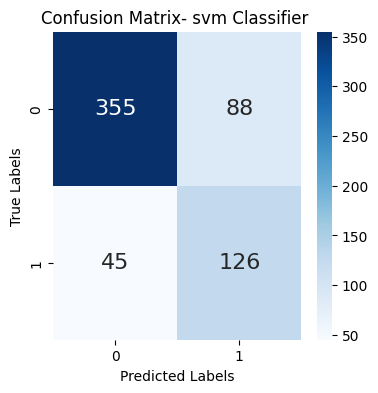

In [89]:
cm_train=confusion_matrix(y_train_prediction, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

Text(0.5, 1.0, 'Confusion Matrix- svm\xa0Classifier\xa0')

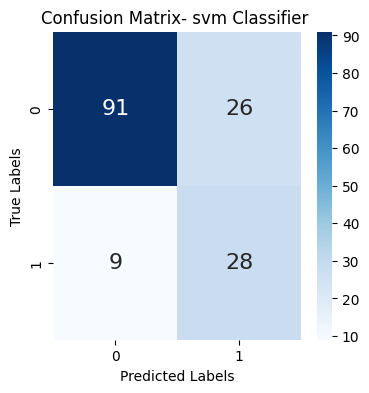

In [90]:
cm_test=confusion_matrix(y_test_prediction, y_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

In [91]:
import pickle

In [92]:
filename = 'diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))